In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors, metrics

%matplotlib inline

In [5]:
speed_dating = pd.read_csv('~/Desktop/Speed_Dating_Data.csv')
speed_dating.head(20)
speed_dating.shape

(8378, 195)

In [10]:
print(speed_dating.attr.max())
print(speed_dating.attr1_1.max())
print(speed_dating.pf_o_att.max())
print(speed_dating.attr_o.max())
print(speed_dating.attr3_1.max())
print(speed_dating.attr5_1.max())

10.0
100.0
100.0
10.5
10.0
10.0


Print the column names of the dataset to the screen, one column name per line.  

In [40]:
my_list = speed_dating.columns.values
for i in my_list:
    print i

iid
id
gender
idg
condtn
wave
round
position
positin1
order
partner
pid
match
int_corr
samerace
age_o
race_o
pf_o_att
pf_o_sin
pf_o_int
pf_o_fun
pf_o_amb
pf_o_sha
dec_o
attr_o
sinc_o
intel_o
fun_o
amb_o
shar_o
like_o
prob_o
met_o
age
field
field_cd
undergra
mn_sat
tuition
race
imprace
imprelig
from
zipcode
income
goal
date
go_out
career
career_c
sports
tvsports
exercise
dining
museums
art
hiking
gaming
clubbing
reading
tv
theater
movies
concerts
music
shopping
yoga
exphappy
expnum
attr1_1
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
attr4_1
sinc4_1
intel4_1
fun4_1
amb4_1
shar4_1
attr2_1
sinc2_1
intel2_1
fun2_1
amb2_1
shar2_1
attr3_1
sinc3_1
fun3_1
intel3_1
amb3_1
attr5_1
sinc5_1
intel5_1
fun5_1
amb5_1
dec
attr
sinc
intel
fun
amb
shar
like
prob
met
match_es
attr1_s
sinc1_s
intel1_s
fun1_s
amb1_s
shar1_s
attr3_s
sinc3_s
intel3_s
fun3_s
amb3_s
satis_2
length
numdat_2
attr7_2
sinc7_2
intel7_2
fun7_2
amb7_2
shar7_2
attr1_2
sinc1_2
intel1_2
fun1_2
amb1_2
shar1_2
attr4_2
sinc4_2
intel4_2
fun4_2
amb

In [41]:
print len(speed_dating)
print speed_dating.shape[0]

8378
8378


In [42]:
# males 
speed_dating_male = speed_dating[speed_dating.gender == 1]
speed_dating_male.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
100,11,1.0,1,2,1,1,10,7,NaN,4,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
101,11,1.0,1,2,1,1,10,3,NaN,10,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
102,11,1.0,1,2,1,1,10,9,NaN,6,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
103,11,1.0,1,2,1,1,10,6,NaN,3,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
104,11,1.0,1,2,1,1,10,4,NaN,1,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN


In [43]:
# number of males 
len(speed_dating_male)

4194

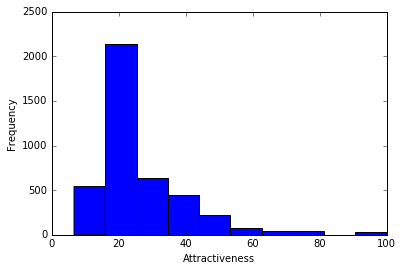

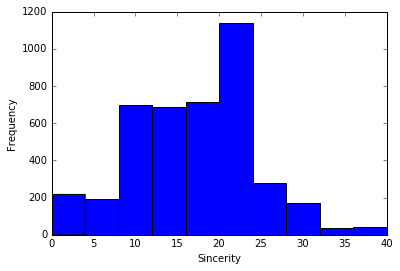

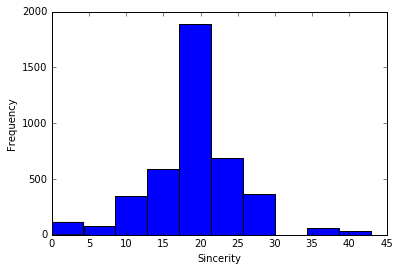

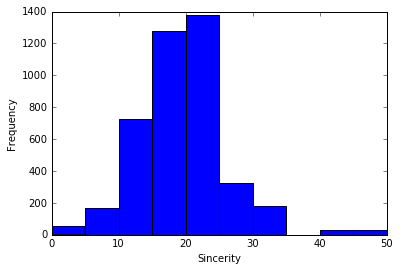

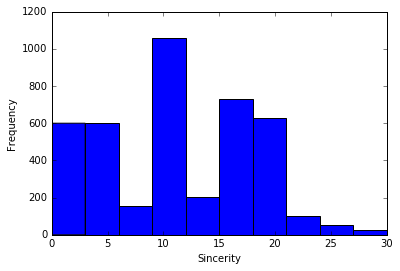

In [44]:
# what males look for in the opposite sex (attractiveness)
plt.hist(speed_dating_male.attr1_1.dropna())
plt.xlabel("Attractiveness")
plt.ylabel("Frequency")
plt.show()

# what males look for in the opposite sex (Sincerity)
plt.hist(speed_dating_male.sinc1_1.dropna())
plt.xlabel("Sincerity")
plt.ylabel("Frequency")
plt.show()

# what males look for in the opposite sex (Intelligence)
plt.hist(speed_dating_male.intel1_1.dropna())
plt.xlabel("Sincerity")
plt.ylabel("Frequency")
plt.show()

# what males look for in the opposite sex (Fun)
plt.hist(speed_dating_male.fun1_1.dropna())
plt.xlabel("Sincerity")
plt.ylabel("Frequency")
plt.show()

# what males look for in the opposite sex (Shared Interests)
plt.hist(speed_dating_male.shar1_1.dropna())
plt.xlabel("Sincerity")
plt.ylabel("Frequency")
plt.show()

In [45]:
# females 
speed_dating_female = speed_dating[speed_dating.gender == 0]
speed_dating_female.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [46]:
# number of females 
len(speed_dating_female)

4184

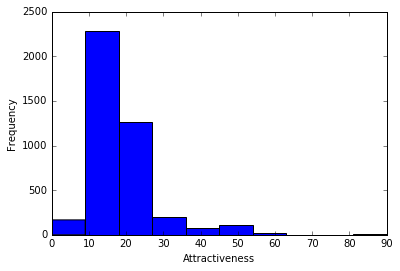

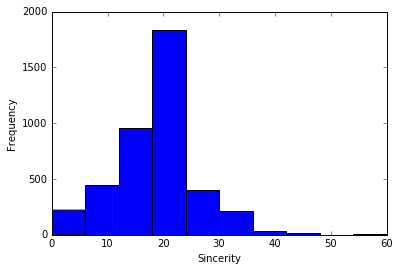

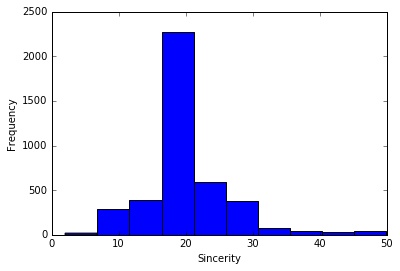

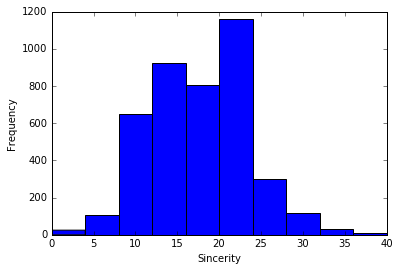

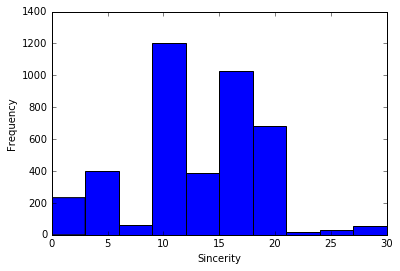

In [47]:
# what females look for in the opposite sex (attractiveness)
plt.hist(speed_dating_female.attr1_1.dropna())
plt.xlabel("Attractiveness")
plt.ylabel("Frequency")
plt.show()

# what females look for in the opposite sex (Sincerity)
plt.hist(speed_dating_female.sinc1_1.dropna())
plt.xlabel("Sincerity")
plt.ylabel("Frequency")
plt.show()

# what females look for in the opposite sex (Intelligence)
plt.hist(speed_dating_female.intel1_1.dropna())
plt.xlabel("Sincerity")
plt.ylabel("Frequency")
plt.show()

# what females look for in the opposite sex (Fun)
plt.hist(speed_dating_female.fun1_1.dropna())
plt.xlabel("Sincerity")
plt.ylabel("Frequency")
plt.show()

# what females look for in the opposite sex (Shared Interests)
plt.hist(speed_dating_female.shar1_1.dropna())
plt.xlabel("Sincerity")
plt.ylabel("Frequency")
plt.show()